In [1]:
import numpy as np
import os
from pylab import *
#import read_TN
from tqdm import tqdm_notebook,tqdm
nbins = 128

import matplotlib as mpl
label_size = 12
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size 

In [2]:
alpha_b = np.zeros(nbins)
delta_b = np.zeros(nbins)
phi_b = np.zeros(nbins)
psi_b = np.zeros(nbins)
om_b = np.zeros(nbins)
inc_b = np.zeros(nbins)
jump_b = np.zeros(nbins)
phi0s_b = np.zeros(nbins)

a_d_2d = np.zeros((nbins,nbins))
a_p_2d = np.zeros((nbins,nbins))
a_z_2d = np.zeros((nbins,nbins))
a_o_2d = np.zeros((nbins,nbins))
a_i_2d = np.zeros((nbins,nbins))
a_j_2d = np.zeros((nbins,nbins))

d_p_2d = np.zeros((nbins,nbins))
d_z_2d = np.zeros((nbins,nbins))
d_o_2d = np.zeros((nbins,nbins))
d_i_2d = np.zeros((nbins,nbins))
d_j_2d = np.zeros((nbins,nbins))

p_z_2d = np.zeros((nbins,nbins))
p_o_2d = np.zeros((nbins,nbins))
p_i_2d = np.zeros((nbins,nbins))
p_j_2d = np.zeros((nbins,nbins))

z_o_2d = np.zeros((nbins,nbins))
z_i_2d = np.zeros((nbins,nbins))
z_j_2d = np.zeros((nbins,nbins))

o_i_2d = np.zeros((nbins,nbins))
o_j_2d = np.zeros((nbins,nbins))

i_j_2d = np.zeros((nbins,nbins))

a_r = (98.6,100.2)
d_r = (60,150)
p_r = (210, 290)
z_r = (-90,90)
o_r = (1.5,3.)
i_r = (25.,70.)
j_r = (78,110)

bins = []
for i in range(7): bins.append([])

phi0s_b = []
for i in range(48): phi0s_b.append(np.zeros(nbins))

#for i in range(0,2000):
for i in tqdm(range(0,20), desc='Reading data'):
    #print i
    #fn = "/Users/gdesvignes/projets/1906/new_data/results/1906-bootstrap/B%d/results-inc-fixed/chains-post_equal_weights.dat"%i
    #fn = "/hercules/results/gdesvign/1906-bootstrap2/B%d/results/chainsMN-post_equal_weights.dat"%i
    #fn = "/hercules/results/gdesvign/new_1906/bootstrap_excluded/B%d/results/chainsMN-post_equal_weights.dat"%i
    #fn = "/hercules/results/gdesvign/paper_1906/mix_oldBON_ASP_PUPPI-jump/B%d/results/chainsPC_equal_weights.txt"%i
    #fn = "/hercules/results/gdesvign/paper_1906/bootstrap2/B%d/results/chainsPC_equal_weights.txt"%i
    fn = "/hercules/results/gdesvign/paper_1906/bootstrap/B%d/results/chainsPC_equal_weights.txt"%i
    #fn = "/hercules/results/gdesvign/paper_1906/bootstrap3/B%d/results-aberr/chainsPC_equal_weights.txt"%i
    #fn = "/hercules/results/gdesvign/paper_1906/mix_oldBON_ASP_PUPPI-aberr//B%d/results/chainsPC_equal_weights.txt"%i
    if not os.path.exists(fn): 
        print (fn, " does not exist")
        continue
    # Read the file
    try: ### for 28 epochs
        #alpha, delta, phi, psi1, psi2, omega, inc, L = np.loadtxt(fn, usecols=(2,3,4,5,6,55,56,57), unpack=True)
        #alpha, delta, phi, psi1, psi2, omega, inc = np.loadtxt(fn, usecols=(2,3,4,5,6,85,86), unpack=True)
        data = (np.loadtxt(fn)).T
        alpha = data[2]
        delta = data[3]
        phi = data[4]
        psi1 = data[5]
        psi2 = data[6]
        #omega = data[55]
        #inc = data[56]
        L = data[55]
        
    except: 
        print (fn)
        raise
    psi = np.arctan(psi2/psi1)*180./np.pi
    psi = np.where(L<0, psi+90, psi)
    psi = np.where(psi>90, psi-180, psi)
         
    #psi = np.arctan(np.tan(psi*np.pi/180.))*180./np.pi
    try:
        n, bins[0] = np.histogram(alpha, nbins, range=a_r, normed=True)
        alpha_b += n
        n, bins[1] = np.histogram(delta, nbins, range=d_r, normed=True)
        delta_b += n
        n, bins[2] = np.histogram(phi, nbins, range=p_r, normed=True) 
        phi_b += n
        n, bins[3] = np.histogram(psi, nbins, range=z_r, normed=True) 
        psi_b += n 
        #n, bins[4] = np.histogram(omega, nbins, range=o_r, normed=True) 
        #om_b += n
        #n, bins[5] = np.histogram(inc, nbins, range=i_r, normed=True) 
        #inc_b += n
        print(psi)
    
        #for ii in range(48):
        #    n, bins_phi = np.histogram(data[ii+7], nbins, range=[80,100], normed=True)
        #    phi0s_b[ii] += n

    
        n, xx,yy = np.histogram2d(alpha, delta, nbins, range=[a_r,d_r] , normed=True)
        a_d_2d += n 
        n, xx,yy = np.histogram2d(alpha, phi, nbins, range=[a_r,p_r] , normed=True)
        a_p_2d += n 
        n, xx,yy = np.histogram2d(alpha, psi, nbins, range=[a_r,z_r] , normed=True)
        a_z_2d += n
        #n, xx,yy = np.histogram2d(alpha, omega, nbins, range=[a_r,o_r] , normed=True)
        #a_o_2d += n
        #n, xx,yy = np.histogram2d(alpha, inc, nbins, range=[a_r,i_r] , normed=True)
        #a_i_2d += n
        #n, xx,yy = np.histogram2d(alpha, jump, nbins, range=[a_r,j_r] , normed=True)
        #a_j_2d += n
    
        n, xx,yy = np.histogram2d(delta, phi, nbins, range=[d_r,p_r] , normed=True)
        d_p_2d += n
        n, xx,yy = np.histogram2d(delta, psi, nbins, range=[d_r,z_r] , normed=True)
        d_z_2d += n
        #n, xx,yy = np.histogram2d(delta, omega, nbins, range=[d_r,o_r] , normed=True)
        #d_o_2d += n
        #n, xx,yy = np.histogram2d(delta, inc, nbins, range=[d_r,i_r] , normed=True)
        #d_i_2d += n
        #n, xx,yy = np.histogram2d(delta, jump, nbins, range=[d_r,j_r] , normed=True)
        #d_j_2d += n
    
        n, xx,yy = np.histogram2d(phi, psi, nbins, range=[p_r,z_r] , normed=True)
        p_z_2d += n
        #n, xx,yy = np.histogram2d(phi, omega, nbins, range=[p_r,o_r] , normed=True)
        #p_o_2d += n
        #n, xx,yy = np.histogram2d(phi, inc, nbins, range=[p_r,i_r] , normed=True)
        #p_i_2d += n
        #n, xx,yy = np.histogram2d(phi, jump, nbins, range=[p_r,j_r] , normed=True)
        #p_j_2d += n
    
        #n, xx,yy = np.histogram2d(psi, omega, nbins, range=[z_r,o_r] , normed=True)
        #z_o_2d += n
        #n, xx,yy = np.histogram2d(psi, inc, nbins, range=[z_r,i_r] , normed=True)
        #z_i_2d += n
        #n, xx,yy = np.histogram2d(psi, jump, nbins, range=[z_r,j_r] , normed=True)
        #z_j_2d += n
    
        #n, xx,yy = np.histogram2d(omega, inc, nbins, range=[o_r,i_r] , normed=True)
        #o_i_2d += n
        #n, xx,yy = np.histogram2d(omega, jump, nbins, range=[o_r,j_r] , normed=True)
        #o_j_2d += n
    
        #n, xx,yy = np.histogram2d(inc, jump, nbins, range=[i_r,j_r] , normed=True)
        #i_j_2d += n
    except:
        pass
    
    

Reading data:   0%|          | 0/20 [00:00<?, ?it/s]/afs/ipp-garching.mpg.de/common/soft/anaconda/amd64_generic/3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:88: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/afs/ipp-garching.mpg.de/common/soft/anaconda/amd64_generic/3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:90: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/afs/ipp

[-87.66660257 -87.05099063 -86.72292317 ... -87.38403799 -86.10072282
 -86.99820569]


Reading data:  10%|█         | 2/20 [00:02<00:23,  1.33s/it]

[-85.28090822 -85.01100743 -85.17156477 ... -85.89385008 -87.04884546
 -85.95769889]


Reading data:  15%|█▌        | 3/20 [00:03<00:19,  1.15s/it]

[-54.08910346 -54.6069847  -54.14475887 ... -54.13645782 -54.06761245
 -53.98225753]


Reading data:  20%|██        | 4/20 [00:03<00:16,  1.05s/it]

[-82.94517591 -84.0394498  -84.19500357 ... -82.62759752 -83.13863242
 -83.04595788]


Reading data:  25%|██▌       | 5/20 [00:04<00:14,  1.04it/s]

[-56.70122399 -57.92652842 -57.95764793 ... -57.19378405 -57.7732903
 -57.29852604]


Reading data:  30%|███       | 6/20 [00:05<00:14,  1.03s/it]

[-53.97111741 -53.56290402 -53.63224685 ... -54.36032743 -53.99243005
 -53.05028271]


Reading data:  35%|███▌      | 7/20 [00:07<00:14,  1.12s/it]

[-52.07303823 -52.33646972 -51.94018703 ... -52.21442251 -52.14811313
 -52.28735042]


Reading data:  40%|████      | 8/20 [00:08<00:14,  1.20s/it]

[-82.54594914 -82.24505147 -82.17113957 ... -82.79019449 -82.85223043
 -83.99256707]


Reading data:  45%|████▌     | 9/20 [00:09<00:12,  1.14s/it]

[-83.36131195 -82.70797583 -83.20625056 ... -83.06440216 -83.11687178
 -82.89388266]


Reading data:  50%|█████     | 10/20 [00:10<00:11,  1.12s/it]

[-52.60889327 -52.80439108 -53.23746714 ... -52.18564416 -51.40378479
 -52.28641874]


Reading data:  55%|█████▌    | 11/20 [00:11<00:09,  1.11s/it]

[-55.80135432 -55.47296538 -57.43715432 ... -55.76023051 -55.70004278
 -55.66074426]


Reading data:  60%|██████    | 12/20 [00:12<00:08,  1.08s/it]

[-82.30179638 -82.47963017 -83.76169266 ... -84.44193429 -84.0364821
 -84.52508076]


Reading data:  65%|██████▌   | 13/20 [00:14<00:09,  1.34s/it]

[-64.28292608 -61.0616052  -61.82067111 ... -62.10498852 -62.41948244
 -61.69325486]


Reading data:  70%|███████   | 14/20 [00:15<00:07,  1.20s/it]

[-58.34623099 -59.78461203 -58.24632168 ... -57.57289724 -57.67105981
 -58.72568306]


Reading data:  75%|███████▌  | 15/20 [00:16<00:05,  1.20s/it]

[-55.6117556  -55.83671942 -55.60808833 ... -55.85130789 -55.83654543
 -55.94657822]


Reading data:  80%|████████  | 16/20 [00:17<00:04,  1.16s/it]

[-84.87350834 -84.06505762 -85.39896074 ... -85.43015874 -85.09518936
 -85.15915095]


Reading data:  85%|████████▌ | 17/20 [00:19<00:03,  1.20s/it]

[-80.80227774 -83.15656104 -80.85897842 ... -82.19277874 -82.46018154
 -82.76023217]


Reading data:  90%|█████████ | 18/20 [00:20<00:02,  1.18s/it]

[-84.47108582 -82.64947086 -82.19224116 ... -83.48184189 -85.77579407
 -84.52484891]


Reading data:  95%|█████████▌| 19/20 [00:21<00:01,  1.14s/it]

[-50.76860313 -51.35500627 -51.6369166  ... -51.11149969 -51.02860113
 -51.21174068]


Reading data: 100%|██████████| 20/20 [00:22<00:00,  1.10s/it]

[-56.98576853 -59.16475172 -58.55161154 ... -55.60310102 -55.78620384
 -55.65362428]


[ 0.36664012  3.9802002  16.52899875] 50.5442026981826
[ 0.33739542  3.57060929 15.33581843] 44.8386009836141
[0.11395991 0.60444144 2.70925679] 3.8939731497610466
[ 0.23412942  2.29407387 10.1442524 ] 27.32440369306952
[0.03826206 0.27066579 0.94648938] 2.285603277170873
[0.03253487 0.23194663 1.11154971] 1.9878327394858637


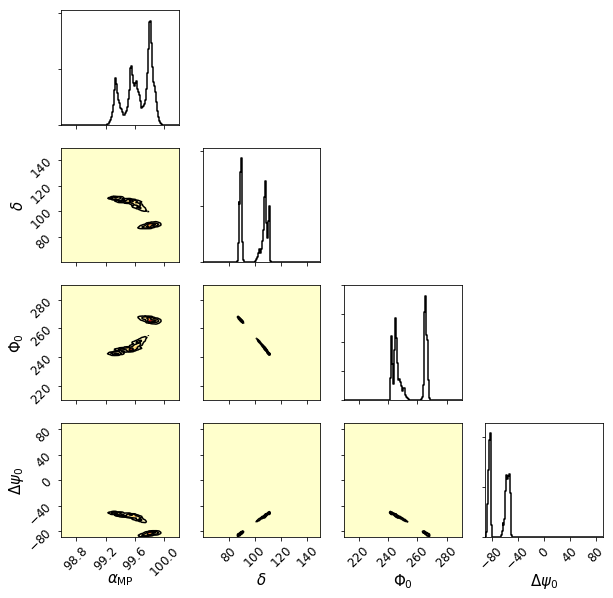

In [3]:
npar = 4
max_n_ticks=5
use_math_text=True
scale_hist = False
top_ticks=False
labels = []
labels.append(r'$\alpha_{\mathrm{MP}}$')
labels.append(r'$\delta$')
labels.append(r'$\Phi_0$')
labels.append(r'$\Delta \psi_0$')
#labels.append(r'$\Omega_{\mathrm{p}}$')
#labels.append(r'$i$')
#labels.append(r'$Jump$')
label_kwargs = {'size': 15}
levels = 1.0 - np.exp(-0.5 * np.arange(1., 3.1, 1.) ** 2)

factor = 2.0           # size of one side of one panel
lbdim = 0.5 * factor   # size of left/bottom margin
trdim = 0.2 * factor   # size of top/right margin
whspace = 0.05         # w/hspace size
plotdim = factor * npar + factor * (npar - 1.) * whspace
dim = lbdim + plotdim + trdim



fig, axes = subplots(npar, npar, figsize=(dim, dim))

for i in range(npar):
    ax = axes[i,i]
    
    x0 = np.array(list(zip(bins[i][:-1], bins[i][1:]))).flatten() 
    if i==0: xdat = alpha_b; X = bins[0]; rangex = a_r
    elif i==1: xdat = delta_b; X = bins[1]; rangex = d_r
    elif i==2: xdat = phi_b; X = bins[2]; rangex = p_r
    elif i==3: xdat = psi_b; X = bins[3]; rangex = z_r
    elif i==4: xdat = om_b; X = bins[4]; rangex = o_r; ax.plot([2.237,2.237],[0, np.max(xdat)*2], color='red')
    elif i==5: xdat = inc_b; X = bins[5]; rangex = i_r; ax.plot([43.7,43.7],[0, np.max(xdat)*2], color='red')
    elif i==6: xdat = jump_b; X = bins[6]; rangex = j_r
    y0 = np.array(list(zip(xdat, xdat))).flatten()
    #print x0, y0
    ax.plot(x0, y0, 'k')
    ax.set_yticklabels([])
    ax.xaxis.set_major_locator(MaxNLocator(max_n_ticks, prune="lower"))
    
    
    # Set up the axes.
    ax.set_xlim(rangex)
    if scale_hist:
        maxn = np.max(xdat)
        ax.set_ylim(-0.1 * maxn, 1.1 * maxn)
    else:
        ax.set_ylim(0, 1.1 * np.max(xdat))
    ax.set_yticklabels([])
    ax.xaxis.set_major_locator(MaxNLocator(max_n_ticks, prune="lower"))

    if i < npar - 1:
        if top_ticks:
            ax.xaxis.set_ticks_position("top")
            [l.set_rotation(45) for l in ax.get_xticklabels()]
        else:
            ax.set_xticklabels([])
    else:
        [l.set_rotation(45) for l in ax.get_xticklabels()]
        if labels is not None:
            ax.set_xlabel(labels[i], label_kwargs)
            ax.xaxis.set_label_coords(0.5, -0.3)

        # use MathText for axes ticks
        ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=use_math_text))


    
    for j in range(npar):
        #print i,j
        ax = axes[i, j]
        if j > i:
            ax.set_frame_on(False)
            ax.set_xticks([])
            ax.set_yticks([])
            continue
        elif i==j: continue    
            
            
        ax.xaxis.set_major_locator(MaxNLocator(max_n_ticks, prune="lower"))
        ax.yaxis.set_major_locator(MaxNLocator(max_n_ticks, prune="lower"))    
 

        if i < npar - 1:
            ax.set_xticklabels([])
        else:
            [l.set_rotation(45) for l in ax.get_xticklabels()]
            if labels is not None:
                ax.set_xlabel(labels[j], label_kwargs)
                ax.xaxis.set_label_coords(0.5, -0.3)

            # use MathText for axes ticks
            ax.xaxis.set_major_formatter(
                ScalarFormatter(useMathText=use_math_text))

        if j > 0:
            ax.set_yticklabels([])
        else:
            [l.set_rotation(45) for l in ax.get_yticklabels()]
            if labels is not None:
                ax.set_ylabel(labels[i], label_kwargs)
                ax.yaxis.set_label_coords(-0.3, 0.5)

            # use MathText for axes ticks
            ax.yaxis.set_major_formatter(
                ScalarFormatter(useMathText=use_math_text))
            
            
        #Now plot the 2-D Histogram
                
        if j==0: Y = bins[0]; rangey = a_r
        elif j==1: Y = bins[1]; rangey = d_r
        elif j==2: Y = bins[2]; rangey = p_r
        elif j==3: Y = bins[3]; rangey = z_r
        elif j==4: Y = bins[4] ; rangey = o_r
        elif j==5: Y = bins[5] ; rangey = i_r
        elif j==6: Y = bins[6]; rangey = j_r
            
        if j==0 and i==1: H = a_d_2d
        elif j==0 and i==2: H = a_p_2d    
        elif j==0 and i==3: H = a_z_2d     
        elif j==0 and i==4: H = a_o_2d
        elif j==0 and i==5: H = a_i_2d   
        elif j==0 and i==6: H = a_j_2d
        elif j==1 and i==2: H = d_p_2d     
        elif j==1 and i==3: H = d_z_2d 
        elif j==1 and i==4: H = d_o_2d
        elif j==1 and i==5: H = d_i_2d  
        elif j==1 and i==6: H = d_j_2d
        elif j==2 and i==3: H = p_z_2d    
        elif j==2 and i==4: H = p_o_2d
        elif j==2 and i==5: H = p_i_2d 
        elif j==2 and i==6: H = p_j_2d
        elif j==3 and i==4: H = z_o_2d
        elif j==3 and i==5: H = z_i_2d
        elif j==3 and i==6: H = z_j_2d
        elif j==4 and i==5:
                H = o_i_2d
                ax.plot([2.237,2.237],[0, 100], color='red') 
                ax.plot([0,5],[43.7, 43.7], color='red')
        elif j==4 and i==6: H = o_j_2d
        elif j==5 and i==6: H = i_j_2d

        #"""    
        # Compute the density levels.
        Hflat = H.flatten()
        inds = np.argsort(Hflat)[::-1]
        Hflat = Hflat[inds]
        sm = np.cumsum(Hflat)
        sm /= sm[-1]
        V = np.empty(len(levels))
        #print V
        for x, v0 in enumerate(levels):
            try:
                V[x] = Hflat[sm <= v0][-1]
            except:
                V[x] = Hflat[0]
        V.sort()
        m = np.diff(V) == 0
        #if np.any(m):
        #     logging.warning("Too few points to create valid contours")
        while np.any(m):
            V[np.where(m)[0][0]] *= 1.0 - 1e-4
            m = np.diff(V) == 0
        V.sort()
        print (V, np.max(H))
            
        #"""
        # Compute the bin centers.
        X1, Y1 = 0.5 * (X[1:] + X[:-1]), 0.5 * (Y[1:] + Y[:-1])

        # Extend the array for the sake of the contours at the plot edges.
        H2 = H.min() + np.zeros((H.shape[0] + 4, H.shape[1] + 4))
        H2[2:-2, 2:-2] = H
        H2[2:-2, 1] = H[:, 0]
        H2[2:-2, -2] = H[:, -1]
        H2[1, 2:-2] = H[0]
        H2[-2, 2:-2] = H[-1]
        H2[1, 1] = H[0, 0]
        H2[1, -2] = H[0, -1]
        H2[-2, 1] = H[-1, 0]
        H2[-2, -2] = H[-1, -1]
        X2 = np.concatenate([
            X1[0] + np.array([-2, -1]) * np.diff(X1[:2]),
            X1,
            X1[-1] + np.array([1, 2]) * np.diff(X1[-2:]),
        ])
        Y2 = np.concatenate([
            Y1[0] + np.array([-2, -1]) * np.diff(Y1[:2]),
            Y1,
            Y1[-1] + np.array([1, 2]) * np.diff(Y1[-2:]),
        ])
        #"""
        #print X.shape, Y.shape
        #print X1.shape, Y1.shape
        #print X2.shape, Y2.shape, H2.T.shape
        #print i,j, 
        #print rangex, rangey
        #print X2,Y2
        #print " "
        ax.contour(Y2, X2, H2.T, V, antialiased=True, colors='k')
        
        ax.set_xlim(rangey)
        ax.set_ylim(rangex)
        
        ax.imshow(H.T, extent=(rangey[0],rangey[1],rangex[0],rangex[1]),aspect='auto', origin='lower',cmap=get_cmap('YlOrRd'))
        #show()

#savefig('1906_posterior_31_epochs_no-jump.pdf', bbox_inches='tight')
#savefig('bootstrap.eps',bbox_inches='tight')
show()    


In [32]:
# alpha
level1, level2, level3 = read_TN.getsigmalevels(alpha_b)
modes = read_TN.find_mode(alpha_b, bins[0], level1)
for ii, md in enumerate(modes):
                print "Alpha #%d: %.2f +/- %.2f %.2f (1-sig)"%(ii, md[0], md[1], md[2])
modes = read_TN.find_mode(alpha_b, bins[0], level2)
for ii, md in enumerate(modes):
                print "Alpha #%d: %.2f +/- %.2f %.2f (2-sig)"%(ii, md[0], md[1], md[2])
#modes = read_TN.find_mode(alpha_b, bins[0], level3)        
#for ii, md in enumerate(modes):
#                print "Alpha #%d: %.2f +/- %.2f %.2f (3-sig)"%(ii, md[0], md[1], md[2])    

# delta
level1, level2, level3 = read_TN.getsigmalevels(delta_b)
modes = read_TN.find_mode(delta_b, bins[1], level1)
for ii, md in enumerate(modes):
                print "Delta #%d: %.2f +/- %.2f %.2f (1-sig)"%(ii, md[0], md[1], md[2])
modes = read_TN.find_mode(delta_b, bins[1], level2)
for ii, md in enumerate(modes):
                print "Delta #%d: %.2f +/- %.2f %.2f (2-sig)"%(ii, md[0], md[1], md[2])
#modes = read_TN.find_mode(delta_b, bins[1], level3)        
#for ii, md in enumerate(modes):
#                print "Delta #%d: %.2f +/- %.2f %.2f (3-sig)"%(ii, md[0], md[1], md[2])  
        
# Phi0
level1, level2, level3 = read_TN.getsigmalevels(phi_b)
modes = read_TN.find_mode(phi_b, bins[2], level1)
for ii, md in enumerate(modes):
                print "Phase #%d: %.2f +/- %.2f %.2f (1-sig)"%(ii, md[0], md[1], md[2])
modes = read_TN.find_mode(phi_b, bins[2], level2)
for ii, md in enumerate(modes):
                print "Phase #%d: %.2f +/- %.2f %.2f (2-sig)"%(ii, md[0], md[1], md[2])
#modes = read_TN.find_mode(phi_b, bins[2], level3)        
#for ii, md in enumerate(modes):
#                print "Phase #%d: %.2f +/- %.2f %.2f (3-sig)"%(ii, md[0], md[1], md[2])            

# Psi0
level1, level2, level3 = read_TN.getsigmalevels(psi_b)
modes = read_TN.find_mode(psi_b, bins[3], level1)
for ii, md in enumerate(modes):
                print "Psi #%d: %.2f +/- %.2f %.2f (1-sig)"%(ii, md[0], md[1], md[2])
modes = read_TN.find_mode(psi_b, bins[3], level2)
for ii, md in enumerate(modes):
                print "Psi #%d: %.2f +/- %.2f %.2f (2-sig)"%(ii, md[0], md[1], md[2])
#modes = read_TN.find_mode(psi_b, bins[3], level3)        
#for ii, md in enumerate(modes):
#                print "Psi #%d: %.2f +/- %.2f %.2f (3-sig)"%(ii, md[0], md[1], md[2])           
        
# Precession rate 
level1, level2, level3 = read_TN.getsigmalevels(om_b)
modes = read_TN.find_mode(om_b, bins[4], level1)
for ii, md in enumerate(modes):
                print "Omega #%d: %.2f +/- %.2f %.2f (1-sig)"%(ii, md[0], md[1], md[2])
modes = read_TN.find_mode(om_b, bins[4], level2)
for ii, md in enumerate(modes):
                print "Omega #%d: %.2f +/- %.2f %.2f (2-sig)"%(ii, md[0], md[1], md[2])
#modes = read_TN.find_mode(om_b, bins[4], level3)        
#for ii, md in enumerate(modes):
#                print "Omega #%d: %.2f +/- %.2f %.2f (3-sig)"%(ii, md[0], md[1], md[2])        
        
# Inclination 
level1, level2, level3 = read_TN.getsigmalevels(inc_b)
modes = read_TN.find_mode(inc_b, bins[5], level1)
for ii, md in enumerate(modes):
                print "Inclination #%d: %.2f +/- %.2f %.2f (1-sig)"%(ii, md[0], md[1], md[2])
modes = read_TN.find_mode(inc_b, bins[5], level2)
for ii, md in enumerate(modes):
                print "Inclination #%d: %.2f +/- %.2f %.2f (2-sig)"%(ii, md[0], md[1], md[2])
#modes = read_TN.find_mode(inc_b, bins[5], level3)
#for ii, md in enumerate(modes):
#                print "Inclination #%d: %.2f +/- %.2f %.2f (3-sig)"%(ii, md[0], md[1], md[2])

99.4064140574
Alpha #0: 99.41 +/- -0.14 0.17 (1-sig)
99.4038531453
Alpha #0: 99.40 +/- -0.34 0.35 (2-sig)
103.99574053
Delta #0: 104.00 +/- -7.75 8.50 (1-sig)
104.027272205
Delta #0: 104.03 +/- -17.78 17.85 (2-sig)
248.775058559
Phase #0: 248.78 +/- -7.53 9.35 (1-sig)
249.055206682
Phase #0: 249.06 +/- -15.93 19.07 (2-sig)
-62.2737986891
29.2949615927
Psi #0: -62.27 +/- -10.85 13.06 (1-sig)
Psi #1: 29.29 +/- -9.61 11.49 (1-sig)
-62.2594941865
28.7243208091
Psi #0: -62.26 +/- -24.93 24.29 (2-sig)
Psi #1: 28.72 +/- -25.91 21.90 (2-sig)
2.16860229882
Omega #0: 2.17 +/- -0.08 0.10 (1-sig)
2.17147587783
Omega #0: 2.17 +/- -0.19 0.22 (2-sig)
44.452573179
Inclination #0: 44.45 +/- -2.23 3.05 (1-sig)
44.7462355246
Inclination #0: 44.75 +/- -4.63 6.27 (2-sig)


In [34]:
import percentiles as pe
#print (bins[4][:-1]+bins[4][1:])/2.
#print len((bins[4][:-1]+bins[4][1:])/2.)
#print om_b
#plot(np.cumsum(om_b)/np.max(np.cumsum(om_b)))
#plot(bins[4])

for i in range(0,6):
  try:  
    if i==0: dat = alpha_b
    elif i==1: dat = delta_b
    elif i==2: dat = phi_b
    elif i==3: dat = psi_b        
    elif i==4: dat = om_b
    elif i==5: dat = inc_b
    median, low1, high1, low2, high2, low3, high3 = pe.percentiles((bins[i][:-1]+bins[i][1:])/2. , np.cumsum(dat)/np.max(np.cumsum(dat)))
    print "%.2f +/- %.2f %.2f"%(median, low1-median, high1-median)

  except:
    raise

99.41 +/- -0.17 0.16
104.25 +/- -8.54 8.60
249.48 +/- -8.59 8.94
29.01 +/- -12.45 11.95
2.17 +/- -0.10 0.11
45.02 +/- -2.63 3.11


In [33]:
pf = open("phi0s.txt", 'w')
for i in range(0,48):
    median, low1, high1, low2, high2, low3, high3 = pe.percentiles((bins_phi[:-1]+bins_phi[1:])/2. , np.cumsum(phi0s_b[i])/np.max(np.cumsum(phi0s_b[i])))
    print "%.2f +/- %.2f %.2f"%(median, low1-median, high1-median)
    pf.write("%d %.2f %.2f %.2f %.2f %.2f\n"%(i, median, low1-median, high1-median, low2-median, high2-median))
pf.close()

90.08 +/- -0.29 0.26
90.08 +/- -0.35 0.35
90.09 +/- -0.40 0.41
90.11 +/- -0.43 0.43
90.12 +/- -0.45 0.47
90.17 +/- -0.48 0.49
90.15 +/- -0.46 0.50
89.65 +/- -0.43 0.46
90.17 +/- -0.52 0.57
90.19 +/- -0.58 0.63
89.70 +/- -0.56 0.60
89.72 +/- -0.56 0.58
89.71 +/- -0.62 0.66
89.77 +/- -0.66 0.70
89.79 +/- -0.53 0.55
89.96 +/- -0.24 0.24
89.95 +/- -0.24 0.24
89.95 +/- -0.23 0.23
89.94 +/- -0.19 0.21
89.94 +/- -0.21 0.22
89.95 +/- -0.24 0.24
89.94 +/- -0.19 0.20
89.94 +/- -0.20 0.20
90.19 +/- -0.33 0.37
90.26 +/- -0.38 0.39
89.80 +/- -0.38 0.93
89.52 +/- -0.94 0.52
90.04 +/- -0.44 0.58
89.93 +/- -0.28 0.38
90.34 +/- -0.40 0.28
90.08 +/- -0.19 1.28
89.90 +/- -0.22 0.22
89.93 +/- -0.21 0.20
89.91 +/- -0.21 0.20
89.90 +/- -0.22 0.21
89.96 +/- -0.26 0.24
89.97 +/- -0.28 0.26
89.96 +/- -0.26 0.26
89.98 +/- -0.26 0.25
90.00 +/- -0.28 0.28
90.00 +/- -0.30 0.28
89.95 +/- -0.30 0.29
90.00 +/- -0.30 0.30
90.06 +/- -0.35 0.32
90.04 +/- -0.34 0.34
90.04 +/- -0.37 0.37
90.07 +/- -0.36 0.36
90.07 +/- -0.